# 📝 오늘 배울 내용
**데이터 전처리**

## 오늘의 목표
1. 결측치 처리
2. 중복 데이터 제거
3. 이상치 처리
4. 데이터 정규화
5. 범주형 데이터 원-핫 인코딩
6. 구간화

* 데이터 분석에서 전처리는 매우 중요하다!!!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


## 1. 결측치
##### 처리방법
1. 데이터 제거
2. 다른 값으로 대체

In [4]:
print(f'전체 데이터: {len(trade)}')
len(trade)-trade.count()

전체 데이터: 199


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [5]:
# 기타사항은 전부 결측치로 필요가 없다.
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [8]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [9]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [10]:
# 결측치가 있는 데이터 행만 추출
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [13]:
# 위의 데이터에서 196,197,198은 기간, 국가명만 제외하고 값이 없으므로 삭제
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수','수입금액','무역수지'], inplace=True)

In [14]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


191번 데이터 보완하는 방법
1. 특정 값 지정
2. 평균, 중앙값으로 대체
3. 다른 데이터를 이용해 대체
4. 시계열 특성일 경우 앞뒤 데이터의 평균으로 대체

In [17]:
trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [18]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[195, '수출금액']) / 2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,4545483.0,1141118.0,5038739.0,NaN


In [19]:
trade.loc[191, '무역수지'] = (trade.loc[188, '무역수지'] + trade.loc[195, '무역수지']) / 2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,4545483.0,1141118.0,5038739.0,299947.0


In [21]:
import os

csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


In [22]:
len(trade)-trade.count()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [24]:
trade = trade.drop('기타사항', axis=1)
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0
195,2020년 05월,일본,166568.0,1798128.0,133763.0,3102734.0,-1304606.0
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN


In [26]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [28]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [33]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수','수입금액','무역수지'], inplace=True)

결측치 앞뒤 인덱스 구해서 채우는 방법

In [60]:
index_na = trade[trade.isnull().any(axis=1)].index

In [62]:
list_index_na = trade[trade['국가명']=='미국'].index.to_list().index(index_na)

In [67]:
before_df_index = trade[trade['국가명']=='미국'].index.to_list()[list_index_na-1]
after_df_index = trade[trade['국가명']=='미국'].index.to_list()[list_index_na+1]

In [74]:
trade.loc[index_na, '수출금액'] = (trade.loc[before_df_index, '수출금액']+trade.loc[after_df_index, '수출금액'])/2
trade.loc[index_na, '무역수지'] = (trade.loc[before_df_index, '무역수지']+trade.loc[after_df_index, '무역수지'])/2

In [75]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


## 2. 중복된 데이터 제거

In [77]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [81]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [82]:
trade.drop_duplicates(inplace=True)

In [90]:
df = pd.DataFrame({'id':['a','b','c','a','e'],
                  'name':['A','B','C','D','E']})
df

,id,name
0,a,A
1,b,B
2,c,C
3,a,D
4,e,E


In [91]:
# id가 같은 것 중 마지막으로 들어온 값을 유지시킴
df.drop_duplicates(subset=['id'], keep='last', inplace=True)

In [92]:
df

,id,name
1,b,B
2,c,C
3,a,D
4,e,E


## 3. 이상치
* 이상치 : 값의 범위에서 벗어나 극단적으로 크거나 작은 값.
_anomaly detection_ 자체가 큰 분야
* 간단하고 자주 사용되는 방법은 `z score`방법
* `z score`
$$\frac{\chi -\mu}{\sigma }$$
* `z score`가 특정 기준을 넘어서면 이상치라고 판단한다.
##### 이상치를 해결하는 방법
1. 이상치를 삭제 후 이상치끼리 따로 분석
2. 다른 값으로 대체(데이터가 적을때는 대체하는게 나을수 있음)
3. 다른 데이터를 활용해 대체
4. 수치형->범주형으로 바꿈

In [93]:
def outlier(df, col, z):
    return df[abs(df[col]-np.mean(df[col]))/np.std(df[col])>z].index

In [94]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [96]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [97]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


기준이 되는 z가 커질수록 이상치가 적어진다.

In [98]:
def not_outlier(df, col, z):
    return df[abs(df[col]-np.mean(df[col]))/np.std(df[col])<z].index

In [99]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


##### IQR 메서드
* 이상치를 찾는 다른 방법
* IQR : 사분위범위수. 3사분위수에서 1사분위를 뺀 값
$$IQR = Q_{3}-Q_{1}$$
* [참고하면 좋을 것 같다.](https://leedakyeong.tistory.com/entry/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84-%EB%B0%B1%EB%B6%84%EC%9C%84%EC%88%98%EC%99%80-%EC%82%AC%EB%B6%84%EC%9C%84%EC%88%98-What-is-Percentile-and-Interquartile-Range)

In [101]:
np.random.seed(2020)
data = np.random.randn(100)
data = np.concatenate((data, np.array([8, 10, -3, -5])))

In [102]:
# 1. 3사분위수와 1사분위수를 구한다.
Q3,Q1 = np.percentile(data, [75, 25])
IQR = Q3-Q1
IQR

1.1644925829790964

In [105]:
data[(Q1-1.5*IQR > data) | (Q3+1.5*IQR < data)] # 1.5를 왜 더하고 빼는지 모르겠다

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

# [이상치 예측](http://colingorrie.github.io/outlier-detection.html)
1. z-score
    * Z 점수를 얻는 목적은 데이터의 위치와 규모에 따른 영향을 제거하여 서로 다른 데이터셋을 직접 비교할 수 있도록 하는 것입니다
    * 문제점 1 : 평균과 표준편차는 특이치에 영향을 받기 때문에 문제가 발생한다.
    * 문제점 2 : 작은 데이터셋에서 이상하게 동작한다.
2. modifed z-score
3. IQR

In [118]:
def outlier2(df, col):
    Q3, Q1 = np.percentile(df[col], [75,25])
    IQR = Q3-Q1
    return df[(Q1-1.5*IQR > df[col])|(Q3+1.5*IQR < df[col])].index

In [119]:
outlier2(trade, '무역수지')

Int64Index([], dtype='int64')

In [122]:
def outlier2(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    return df[(Q1-1.5*IQR > df[col])|(Q3+1.5*IQR < df[col])]

In [123]:
outlier2(trade, '무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


* 백분위수 구하는 함수
    * numpy에서는 percentile    
        numpy의 percentile함수의 q(백분위수)는 0과 100사이 값을 입력합니다. 
    * pandas에서는 quantile    
        pandas의 quantile함수의 q(백분위수)는 0과 1사이 값을 입력

## 4. 정규화
컬럼마다 스케일 차이 나는 것을 정규화를 통해 처리한다.
* 표준화: 데이터의 평균은 0, 분산은 1로 변환
$$\frac{\chi -\mu}{\sigma }$$
* Min-Max Scaling : 데이터의 최솟값은 0, 최대값은 1로 변환
$$\frac{\chi -\chi _{min}}{\chi _{max}-\chi _{min}}$$

In [127]:
# 정규분포로 랜덤하게 데이터 생성
np.random.seed(100)
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                  'B': np.random.randn(100)-1})
x

,A,B
0,-2.999062,-2.704651
1,5.370722,-2.136261
2,8.612143,-3.973315
3,2.990256,-0.966683
4,7.925283,-1.248889
...,...,...
95,4.012070,-0.350827
96,3.695906,-1.174782
97,4.015830,0.017264
98,3.259944,-1.599983


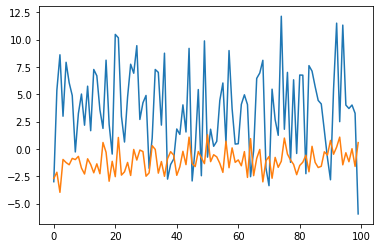

In [128]:
plt.plot(x)
plt.show()

In [125]:
# 표준화
x_standard = (x-x.mean())/x.std()
x_standard

,A,B
0,-1.688421,-1.528307
1,0.458474,-0.996814
2,1.289917,-2.714616
3,-0.152128,0.096841
4,1.113733,-0.167046
...,...,...
95,0.109972,0.672718
96,0.028875,-0.097749
97,0.110937,1.016915
98,-0.082952,-0.495349


In [131]:
# Min-Max Scaling
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.163075,0.240643
1,0.625825,0.348457
2,0.805038,0.000000
3,0.494214,0.570305
4,0.767063,0.516776
...,...,...
95,0.550708,0.687122
96,0.533228,0.530833
97,0.550916,0.756943
98,0.509124,0.450179


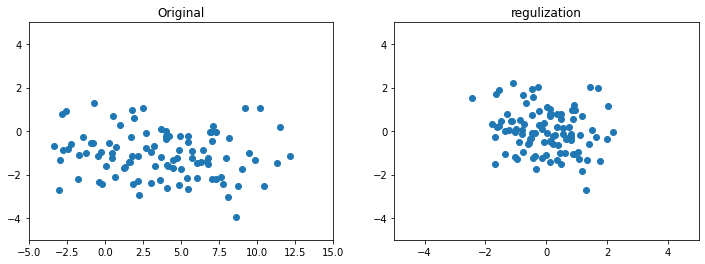

In [136]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].set_title('Original')

axs[1].scatter(x_standard['A'], x_standard['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].set_title('regulization')
plt.show()

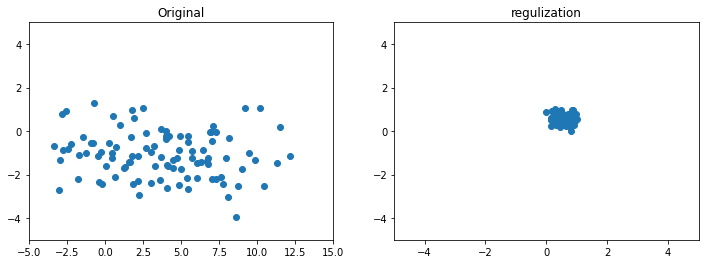

In [137]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].set_title('Original')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].set_title('regulization')
plt.show()

In [138]:
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [140]:
def normalize_standard(data, cols):
    x_standard = (data[cols]-data[cols].mean())/data[cols].std()
    return x_standard

def normalize_min_max(data, cols):
    x_min_max = (data[cols]-data[cols].min())/(data[cols].max()-data[cols].min())
    return x_min_max

In [143]:
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
standard = normalize_standard(trade, cols)
standard.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,4.099285e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.604200e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.117203e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.422420e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.457220e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.433663e+00


In [144]:
min_max = normalize_min_max(trade, cols)
min_max.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397289
std,0.156108,0.302099,0.235988,0.273790,0.247656
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


###  주의할점 : train데이터와 test데이터가 나누어져 있는 경우 train데이터를 정규화시켰던 기준 그대로 test 데이터도 정규화 시켜야 한다.
-> 나누지 않고 정규화를 하면 테스트 데이터도 섞인 기준으로 정규화되기 때문에 나누고 동일한 기준으로 테스트 데이터를 정규화해야 한다.

In [154]:
# scikit-learn의 함수를 사용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]

In [155]:
scaler.fit_transform(train)# fit_transform : 정규화 기준을 저장하면서 정규화한다.

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [156]:
scaler.transform(test) 

array([[-0.25,  0.55]])

## 5. One-Hot Encoding
카테고리별 이진 특성을 만들어 해당하는 특성만 1, 나머지는 0으로 만드는 방법

In [157]:
print(trade['국가명'].head())

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


In [160]:
# get_dummies으로 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country

,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
191,1,0,0
192,0,1,0
193,0,0,1
194,1,0,0


In [162]:
# trade와 country를 합친다.
trade = pd.concat([trade, country], axis = 1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


In [163]:
trade.drop(['국가명'], axis=1, inplace=True)

In [164]:
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


##### 판다스 함수 인자로 계속 나오던 axis에 대해서

축에 대한 것. 
* axis = 1 : 열을 따라 동작
* axis = 0 : 행을 따라 동작

## 6. 구간화

히스토그램같이 연속적인 데이터를 나눠 분석할 때 사용하는 방법

In [165]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

<AxesSubplot:>

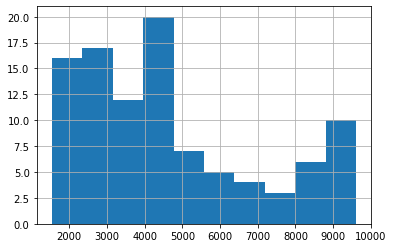

In [166]:
salary.hist()

In [167]:
bins = [0,2000,4000,6000,8000,10000]

In [170]:
# 구간을 지정하는 방법
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [171]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [172]:
# 구간의 개수를 지정
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [174]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

In [175]:
# qcut : 데이터 분포를 비슷한 크기의 그룹으로 나눔
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

## 실제 데이터로 실습

In [246]:
csv_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/vgsales.csv'
sales = pd.read_csv(csv_path)
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [247]:
# 결측치 파악
print(f'전체 데이터 수 : {len(sales)}')
len(sales)-sales.count()

전체 데이터 수 : 16598


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [248]:
for i, v in sales[sales.isnull().any(axis=1)]['Name'].items():
    year = v.split(' ')[-1]
    try:
        if len(year) == 4:
            sales.loc[i, 'Year'] = float(year)
    except:
        continue


In [249]:
sales.loc[sales.isnull().any(axis=1),'Publisher']='Unknown'

In [250]:
sales.loc[sales.isnull().any(axis=1), 'Year'] = 0.0

In [251]:
print(f'전체 데이터 수 : {len(sales)}')
len(sales)-sales.count()

전체 데이터 수 : 16598


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [252]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [253]:
# 카테고리 데이터 : Platform, Genre, Pulisher
category_index = ["Platform", "Genre", "Publisher"]
print("Platform")
print(sales["Platform"].value_counts(), end='\n=====\n')
print("Genre")
print(sales["Genre"].value_counts(), end='\n=====\n')
print("Publisher")
print(sales["Publisher"].value_counts(), end='\n=====\n')

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
=====
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64
=====
Publisher
Electronic Arts                 1343
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Warp                           

In [254]:
def my_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    return df[(Q1-1.5*IQR > df[col])|(Q3+1.5*IQR < df[col])]

In [255]:
EU_Sales = my_outlier(sales,'EU_Sales')
JP_Sales = my_outlier(sales,'JP_Sales')
NA_Sales = my_outlier(sales,'NA_Sales')
Other_Sales = my_outlier(sales,'Other_Sales')
Global_Sales = my_outlier(sales,'Global_Sales')